# Birthquake

We'd like to know what earthquakes occurred on our birthday.

**Proxy trouble? See below.**

Let's make some strings!

In [1]:
birthday = '1971-05-26'
birthdayafter = '1971-05-27'

Now we can build a URL by concatenating the strings:

In [2]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

query_url = url + "?format=csv&starttime=" + birthday + "&endtime=" + birthdayafter

Or even do it with an f-string, which is a tiny bit shorter:

In [3]:
query_url = f"{url}?format=csv&starttime={birthday}&endtime={birthdayafter}"

In [5]:
import pandas as pd

df = pd.read_csv(query_url)

In [6]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1971-05-26T19:13:01.180Z,46.347,-119.063167,5.161,1.30,md,5.0,219.0,0.1177,0.06,...,2016-07-24T23:45:46.740Z,Washington,earthquake,0.48,0.63,0.310,5.0,reviewed,uw,uw
1,1971-05-26T18:16:53.050Z,33.262,-116.775667,7.900,3.02,ml,8.0,137.0,0.1168,0.45,...,2016-01-29T01:25:09.630Z,"2km NNW of Lake Henshaw, CA",earthquake,1.58,1.88,0.252,5.0,reviewed,ci,ci
2,1971-05-26T06:13:16.000Z,31.329,131.445000,51.100,6.20,mw,NaN,NaN,NaN,NaN,...,2020-03-26T19:09:05.506Z,"Kyushu, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
3,1971-05-26T02:41:47.000Z,35.613,58.307000,15.000,5.70,mw,NaN,NaN,NaN,NaN,...,2020-03-26T19:08:53.162Z,northeastern Iran,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,1971-05-26T00:11:56.000Z,-24.835,-179.036000,418.200,5.60,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:05.000Z,south of the Fiji Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem


## Using a `dict`

In [7]:
query = {
    'format': 'csv',
    'starttime': birthday,
    'endtime': birthdayafter,
}

In [8]:
from urllib.parse import urlencode

pd.read_csv(f"{url}?{urlencode(query)}")

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1971-05-26T19:13:01.180Z,46.347,-119.063167,5.161,1.30,md,5.0,219.0,0.1177,0.06,...,2016-07-24T23:45:46.740Z,Washington,earthquake,0.48,0.63,0.310,5.0,reviewed,uw,uw
1,1971-05-26T18:16:53.050Z,33.262,-116.775667,7.900,3.02,ml,8.0,137.0,0.1168,0.45,...,2016-01-29T01:25:09.630Z,"2km NNW of Lake Henshaw, CA",earthquake,1.58,1.88,0.252,5.0,reviewed,ci,ci
2,1971-05-26T06:13:16.000Z,31.329,131.445000,51.100,6.20,mw,NaN,NaN,NaN,NaN,...,2020-03-26T19:09:05.506Z,"Kyushu, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
3,1971-05-26T02:41:47.000Z,35.613,58.307000,15.000,5.70,mw,NaN,NaN,NaN,NaN,...,2020-03-26T19:08:53.162Z,northeastern Iran,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,1971-05-26T00:11:56.000Z,-24.835,-179.036000,418.200,5.60,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:05.000Z,south of the Fiji Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem


## Using `requests`

Pandas is reading the resource using a CSV reader. We can use another library, `requests` to inspect the resource as raw text:

In [10]:
import requests

query = {
    'format': 'text',  # <-- try some other formats
    'starttime': birthday,
    'endtime': birthdayafter,
}

r = requests.get(url, query)

print(r.text)

#EventID|Time|Latitude|Longitude|Depth/km|Author|Catalog|Contributor|ContributorID|MagType|Magnitude|MagAuthor|EventLocationName
uw10839058|1971-05-26T19:13:01.180|46.347|-119.0631667|5.161|uw|uw|uw|uw10839058|md|1.3|uw|Washington
ci3322919|1971-05-26T18:16:53.050|33.262|-116.7756667|7.9|ci|ci|ci|ci3322919|ml|3.02|ci|2km NNW of Lake Henshaw, CA
iscgem784996|1971-05-26T06:13:16.000|31.329|131.445|51.1|iscgem|iscgem|us|iscgem784996|mw|6.2|iscgem|Kyushu, Japan
iscgem784988|1971-05-26T02:41:47.000|35.613|58.307|15|iscgem|iscgem|us|iscgem784988|mw|5.7|iscgem|northeastern Iran
iscgem784983|1971-05-26T00:11:56.000|-24.835|-179.036|418.2|iscgem|iscgem|us|iscgem784983|mw|5.6|iscgem|south of the Fiji Islands



## Make a map

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.plot(df.loc[4, 'longitude'], df.loc[4, 'latitude'], 'o', color='red')
plt.show()

## A nicer map

In [7]:
lat, lon = df.latitude, df.longitude

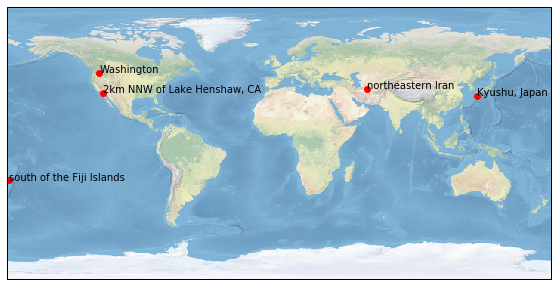

In [8]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.plot(lon, lat, 'o', color='red')

for i, name in enumerate(df.place):
    ax.annotate(name, (lon[i], lat[i]))

plt.show()

## More elegant

We can use `dateutil` to make it a bit more convenient, allowing us to easily add a day, and specify a timezone:

In [10]:
import pandas as pd
from datetime import datetime, timedelta
from urllib.parse import urlencode


def birthquake(birthday:str, tz:str='+0000') -> pd.DataFrame:
    """
    Make a DataFrame of earthquakes on a given day.
    Timezone argument `tz` is optional and must have
    sign and 4 digits.
    
    Example: birthquake("1971-05-26" , tz="+0100")
    """
    birthday = datetime.strptime(f"{birthday} {tz}", '%Y-%m-%d %z')

    url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
    query = {
        'format': 'csv',
        'starttime': birthday,
        'endtime': birthday + timedelta(days=1),
    }

    # Amazingly, urlencode knows what to do with a datetime object.
    return pd.read_csv(f"{url}?{urlencode(query)}")

In [11]:
birthquake('1971-05-26', '-0000')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1971-05-26T19:13:01.180Z,46.347,-119.063167,5.161,1.30,md,5.0,219.0,0.1177,0.06,...,2016-07-24T23:45:46.740Z,Washington,earthquake,0.48,0.63,0.310,5.0,reviewed,uw,uw
1,1971-05-26T18:16:53.050Z,33.262,-116.775667,7.900,3.02,ml,8.0,137.0,0.1168,0.45,...,2016-01-29T01:25:09.630Z,"2km NNW of Lake Henshaw, CA",earthquake,1.58,1.88,0.252,5.0,reviewed,ci,ci
2,1971-05-26T06:13:16.000Z,31.329,131.445000,51.100,6.20,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:05.000Z,"Kyushu, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
3,1971-05-26T02:41:47.000Z,35.613,58.307000,15.000,5.70,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:05.000Z,northeastern Iran,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,1971-05-26T00:11:56.000Z,-24.835,-179.036000,418.200,5.60,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:05.000Z,south of the Fiji Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem


----
## A note about proxies

If you are in a corporate environment, you probably connect to the Internet through another computer called a 'proxy'. You will need the URL of this proxy; it might look like `https://proxy.my-company.net:8080`. Then use it in your Python environment like this:

    proxies  = {'https': 'https://proxy.my-company.net:8080'}
    r = requests.get(url, proxies=proxies)
    
Each time you use `requests.get()` you will need to pass the `proxies` dictionary in this way.